<a href="https://colab.research.google.com/github/SamikshaSolanke/Uber-Fare-Prediction-using-Python/blob/main/Uber_fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install basemap
!pip install h3
!pip install contextily
!pip install folium
!pip install geopandas
!pip install contextily

  Using cached contextily-1.6.2-py3-none-any.whl.metadata (2.9 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached rasterio-1.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.1 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached contextily-1.6.2-py3-none-any.whl (17 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
Using cached rasterio-1.4.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (22.2 MB)
Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)
Using cached affine-2.4.0-py3-none-any.whl (15 kB)
Using cached c

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import geodesic
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Uber Project/uber.csv")

# Load & Explore the Data

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df.drop(columns = ['Unnamed: 0', 'key'])

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [9]:
print(df.isna().sum())

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


In [10]:
df.dropna(inplace=True)

# Convert Datetime & Feature Engineering

In [11]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [12]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['month'] = df['pickup_datetime'].dt.month

In [13]:
df.drop(['Unnamed: 0', 'key', 'pickup_datetime'], axis=1, inplace=True)

In [14]:
def haversine_distance(lat1, lon1, lat2, lon2):
    lat1 = max(min(lat1, 90), -90)
    lat2 = max(min(lat2, 90), -90)

    return geodesic((lat1, lon1), (lat2, lon2)).kilometers

In [15]:
df['distance_km'] = df.apply(lambda row: haversine_distance(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

# Exploratory Data Analysis (EDA)

In [16]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week,month,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3,5,1.681111
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4,7,2.454363
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0,8,5.039603
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4,6,1.661442
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3,8,4.483730
...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,6,10,0.112128
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,4,3,1.879635
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,0,6,12.867916
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,2,5,3.536552


In [17]:
print(df.shape)

(199999, 10)


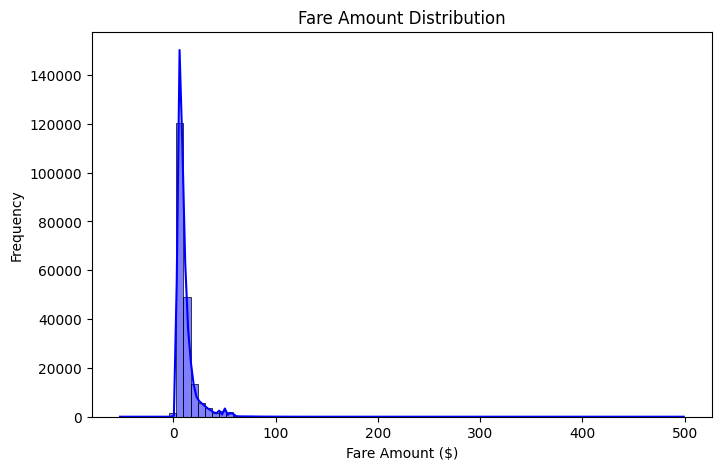

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['fare_amount'], bins=80, kde=True, color='blue')
plt.title("Fare Amount Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()

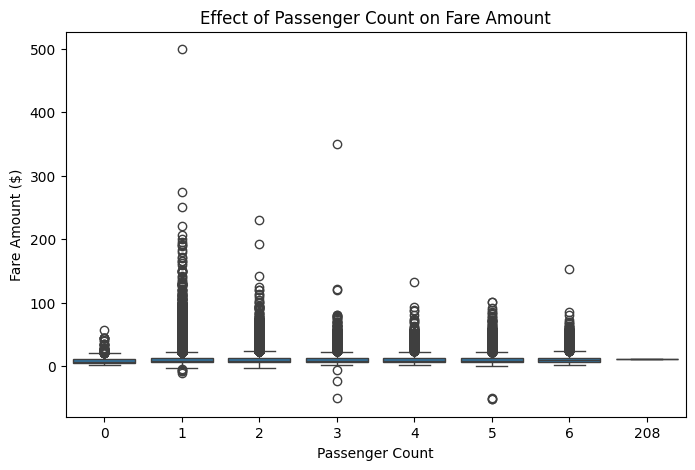

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['passenger_count'], y=df['fare_amount'])
plt.title("Effect of Passenger Count on Fare Amount")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.show()

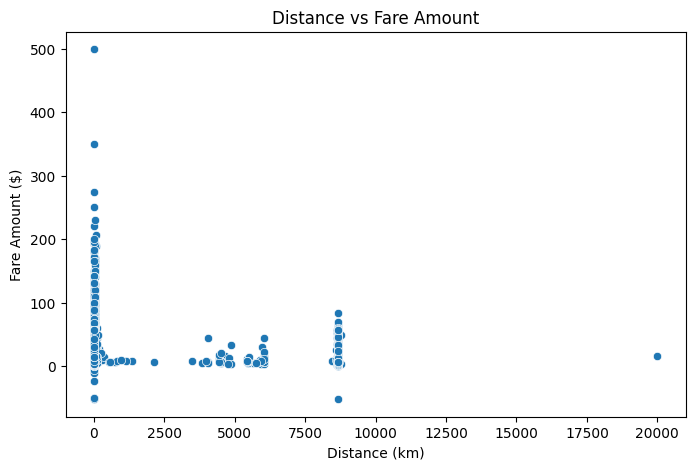

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['distance_km'], y=df['fare_amount'])
plt.title("Distance vs Fare Amount")
plt.xlabel("Distance (km)")
plt.ylabel("Fare Amount ($)")
plt.show()

# Train-Test Split

In [23]:
X = df.drop(columns=['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'])
y = df['fare_amount']

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

Training Set: (159999, 5), Testing Set: (40000, 5)


**Linear Regression Model**

In [24]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate Linear Regression
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - RMSE: {lr_rmse}, R² Score: {lr_r2}")

Linear Regression - RMSE: 10.191631844188283, R² Score: 0.0014859509053319897


**Random Forest Model**

In [25]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Random Forest - RMSE: {rf_rmse}, R² Score: {rf_r2}")

Random Forest - RMSE: 6.112315864857502, R² Score: 0.6408479879877773


In [27]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 5.2 MB/s eta 0:00:00


**XGBoost**

In [28]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_r2 = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - RMSE: {xgb_rmse}, R² Score: {xgb_r2}")

XGBoost - RMSE: 6.748792354993657, R² Score: 0.5621565494324083


**GBR**

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

gbr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
gbr_r2 = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting - RMSE: {gbr_rmse}, R² Score: {gbr_r2}")

Gradient Boosting - RMSE: 5.791984519677443, R² Score: 0.6775060954546631


# MODEL COMPARISON

In [33]:
models = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost", "GBR"],
    "RMSE": [lr_rmse, rf_rmse, xgb_rmse, gbr_rmse],
    "R² Score": [lr_r2, rf_r2, xgb_r2, gbr_r2]
})
print(models)

               Model       RMSE  R² Score
0  Linear Regression  10.191632  0.001486
1      Random Forest   6.112316  0.640848
2            XGBoost   6.748792  0.562157
3                GBR   5.791985  0.677506


**RANDOM FOREST**

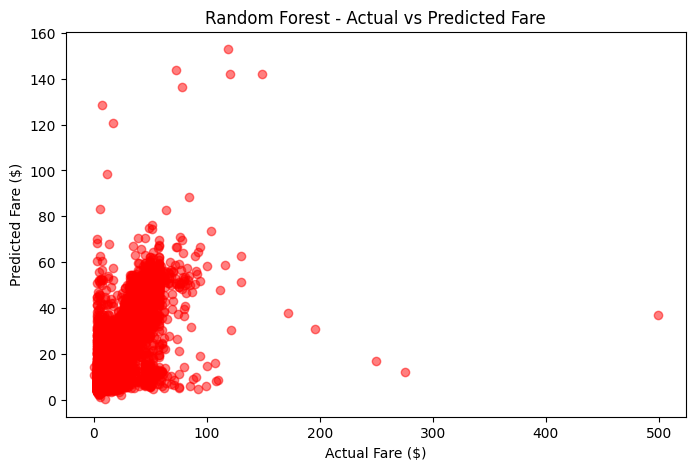

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color="red")
plt.title("Random Forest - Actual vs Predicted Fare")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.show()

**Linear Regression**

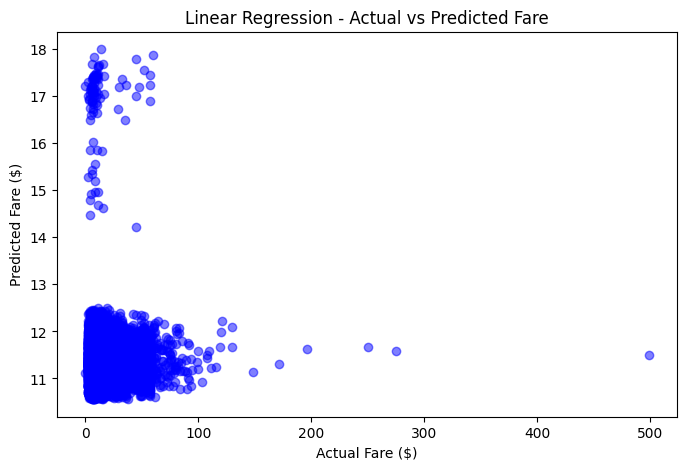

In [36]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue")
plt.title("Linear Regression - Actual vs Predicted Fare")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.show()

**XGBoost**

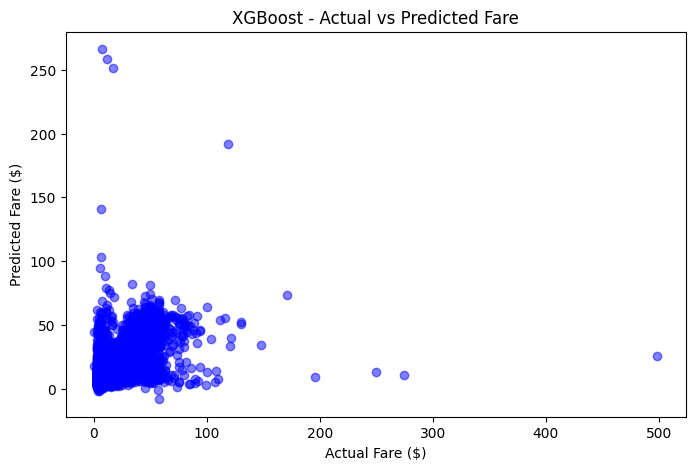

In [37]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="blue")
plt.title("XGBoost - Actual vs Predicted Fare")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.show()

**GBR**

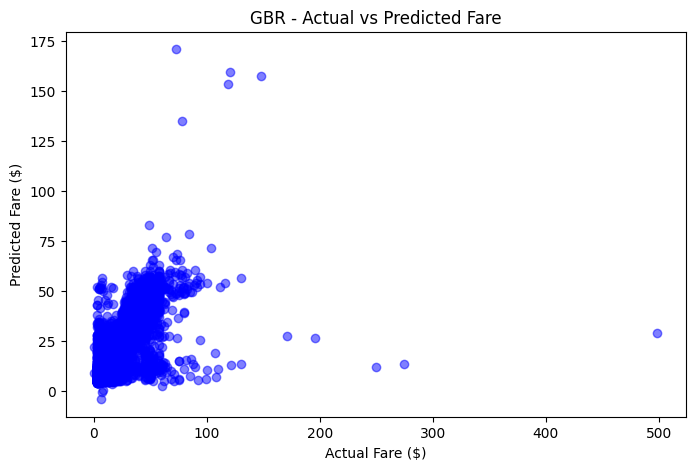

In [38]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_gbr, alpha=0.5, color="blue")
plt.title("GBR - Actual vs Predicted Fare")
plt.xlabel("Actual Fare ($)")
plt.ylabel("Predicted Fare ($)")
plt.show()